## Problem 1
If we have a constant elasticity demand function, $q=\frac{1}{2}p^{-0.2} + \frac{1}{2}p^{-0.5}$ and a quantity demanded of q=2, what market price clears the market?

This has no closed form solution, but we can solve it numerically with Newton's method.

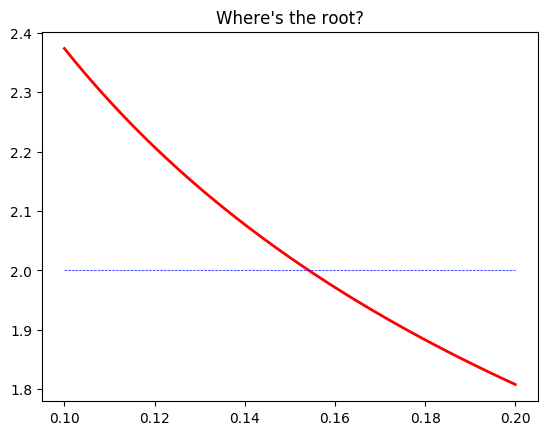

PyObject <matplotlib.text.Text object at 0x7f61ec5b2b50>

In [1]:
# Plot the function
using PyPlot

# We know solution is between .1 and .2
x = linspace(.1,.2,1000)
z = 2*ones(length(x))
# Price function minus equilibrium quantity of 2
price(p) = 0.5*p.^(-0.2) + 0.5*p.^(-0.5)

# Get corresponding quantity values at these prices
y = price(x)

# Plot
plot(x, y, color="red", linewidth=2.0)
plot(x, z, color="blue", linewidth=0.5, linestyle="--")
title("Where's the root?")

In [2]:
# Initial price guess
p = 0.20

# Initialize stepsize
deltap = 1.0e10

# Demand function
demand_function(p) = (.5*p^(-.2)+.5*p^( -.5) -2)
# Gradient of demand function
demand_function_gradient(p) = (.1*p^(-1.2) +.25*p^(-1.5))

# Loop through Newton's method until tolerance is met
while abs(deltap) > 1e-8
    deltap = demand_function(p)/demand_function_gradient(p)
    p += deltap
end

println("The equilibrium price is \$$(round(p*1000)/1000).")

The equilibrium price is $0.154.


## Problem 2
Consider a two period model of an agricultural commodity market. Acreage decisions must be made before knowing the realization of per-acre yield and the price at harvest. The farmer has an expectation of the harvest price and makes decisions as a function of the expectation: $a = 0.5 + 0.5E[p]$. After planting, the random yield per-acre, $\hat{y}$ is realized, producing a quantity $q = a\hat{y}$ of the crop. Demand for the crop is given by the inverse demand function $p = 3 − 2q$ and the government sets a price floor of \$1. Suppose $\hat{y}$ is exogenous and has mean of $1$ and variance $0.1$. How much acreage does the farmer plant?

In [5]:
using CompEcon
# Create quadrature
y, w = qnwnorm(10, 1, 0.1)

# Initial guess for acreage
a = 1.
p = 0. # Need to define price outside the loop to have correct scope
diff = 100

# Loop through solution algorithm until tolerance is met
while diff > 1e-8
    # Save old acreage
    aold = a
    # Get price at all the quadrature nodes y
    p = 3.-2.*a*y
    # Compute expected price with price floor
    expectation = w'*max(p,1)
    # Get new acreage planted given new price
    a = 0.5 + 0.5*expectation[1]
    # Get difference between old and new acreage
    diff = abs(a-aold)
end

println("The optimal number of acres planted is $(round(a*1000)/1000).")
println("The expected price is $(round((w'*max(p,1))[1]*1000)/1000).")

INFO: Precompiling module CompEcon.


The optimal number of acres planted is 1.096.
The expected price is 1.192.


# Problem 3

Test the time to invert increasing large matrices.

In [10]:
# Initialize matrices
A100 = rand(100,100)
A1000 = rand(1000,1000)
A10000 = rand(10000,10000)

@time invA100 = inv(A100)

  0.009449 seconds (17 allocations: 208.578 KB)


100×100 Array{Float64,2}:
  0.302027     1.49941      0.218041   …  -0.122225    0.275047    0.185033 
  0.00597048  -0.61053     -0.259047       0.0689332  -0.186578   -0.245418 
  0.214189    -0.654128    -0.845369      -0.126759   -0.143699   -0.263626 
  0.00433447   0.377561     0.0860121     -0.0827963   0.317396    0.141982 
  0.176594     0.515905    -0.141904       0.106142    0.119844   -0.0905616
  0.0548005    0.43617     -0.328496   …  -0.130857   -0.367003    0.0744987
 -0.03589     -0.218515    -0.108442      -0.0679167   0.118435    0.0012235
  0.437721    -1.27478     -1.27932       -0.434004   -0.260992   -0.363766 
 -0.0269112   -0.00940785  -0.17584        0.212917    0.443497   -0.250951 
  0.00459393  -0.591427    -0.720454      -0.0915741  -0.0325492  -0.129622 
  0.253061     0.0623222   -0.723409   …   0.126294    0.0473554  -0.227535 
 -0.148157     0.562437     0.0635593     -0.102977    0.374631    0.177711 
 -0.0830957    0.322832     0.479032       0.09781

In [8]:
@time invA1000 = inv(A1000)

  0.062391 seconds (17 allocations: 15.763 MB)


1000×1000 Array{Float64,2}:
  0.488078     0.253716   -0.0123705   …   0.781872    -0.218015  
  0.129619     0.125747   -0.197981        0.181986    -0.0536074 
  0.0367427    0.179863    0.0226684       0.275132    -0.0975394 
  0.246433     0.135241   -0.14526         0.401263    -0.219644  
  0.0682656    0.102582    0.10765         0.261914    -0.0648654 
  0.125121    -0.0156507  -0.137232    …   0.292114    -0.108354  
  0.0349343   -0.0191411  -0.0546742       0.15125     -0.0756142 
  0.456681     0.312723   -0.174541        0.71796     -0.178574  
  0.0411671   -0.0780308   0.0239181       0.00116661  -0.0354648 
 -0.0221633   -0.051623   -0.211167       -0.334433     0.0890271 
  0.112672     0.0243546  -0.0217745   …   0.499616    -0.210576  
  0.262452     0.058889   -0.261287        0.789074    -0.312524  
  0.0791589   -0.0175792   0.0565595      -0.0110528   -0.00880167
  ⋮                                    ⋱                          
  0.104025     0.0122946  -0.12293

In [11]:
@time invA10000 = inv(A10000)

 27.605935 seconds (20 allocations: 1.495 GB, 0.03% gc time)


10000×10000 Array{Float64,2}:
 -0.0303939    0.0356062    0.0131623   …   0.0179415    0.00409976 
 -0.155104     0.0736871   -0.00249107      0.0306249    0.0477829  
 -0.224773     0.113026    -0.0160703       0.0290616    0.0538518  
 -0.102727     0.0269602   -0.00834753     -0.0291332    0.0276581  
  0.0432515   -0.0171551    0.00168294     -0.00167829  -0.0188803  
 -0.00916208  -0.0388088    0.012811    …  -0.0312821   -0.054794   
  0.0463339    0.00497364  -0.00901516      0.0209348    0.0035143  
 -0.0150227    0.0422304    0.00181632      0.0262259    0.0201779  
  0.15249     -0.0928711   -0.00214264     -0.0458314   -0.0378225  
  0.0118049    0.0371255   -0.0258258       0.0474853    0.0213974  
  0.177316    -0.12335     -0.00634155  …  -0.0369849   -0.079085   
 -0.114993     0.0844778    0.0209744       0.0201971   -0.000295981
  0.130152    -0.0474099    0.00814266      0.0162828   -0.0114012  
  ⋮                                     ⋱                           
  0.

What is machine epsilon, machine zero and machine infinity in Julia?

In [ ]:
println("Machine epsilon is $(eps()).")

1+eps()/2 > 1

In [ ]:
println("Machine zero is $(realmin()).")

In [ ]:
println("Machine infinity is $(realmax()).")

# Problem 4
Compute one-sided finite differences of x^2 at x=2 for differences of $h=1e-8, 1e-12, 1e-30, 1e-1$.

In [ ]:
# Finite-difference as a function of the difference h and value x
x_sq_deriv(h,x) = ((x+h)^2 - x^2)/h

# Display several finite differences
println(x_sq_deriv(1.e-8,2.))
println(x_sq_deriv(1.e-12,2.))
println(x_sq_deriv(1.e-30,2.))
println(x_sq_deriv(1.e-1,2.))

# Problem 5
Compute the same inverse with two different inversion techniques, the standard inversion algorithm and LU-Factorization.

In [ ]:
A = rand(10000,10000)
@time inv1 = inv(A)
@time inv2 = A\eye(10000,10000)
println("The maximum relative error is $(maximum((inv1-inv2)./inv1)).")

# Problem 6
Are these two expressions numerically equivalent?

In [ ]:
x = (1e-20 + 1) -1
y = 1e-20 + (1 - 1)

# Logical Statement ? Do this if true : else do this
x==y ? println("Equivalent!") : println("Truncation error!")

# Problem 7
Are these two expressions numerically equivalent?

In [ ]:
x = 100000.2 - 100000.1
y = .1

# Logical Statement ? Do this if true : else do this
x==y ? println("Equivalent!") : println("Truncation error!")

In [16]:
abs(sin(.1)-(.1-.1^3/6))

8.331349481138783e-8